# CEE 498: Transportation Economics
## Assignment Four
### Noah Garfinkle (garfink2@illinois edu)
### 11 March 2020

## Imports and Setup

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize
import sympy as sy

## Parameters

In [5]:
μ=0.5
α=10.0
β=0.5
t_f = 2.0
z_0 = 1.0
γ = 6.0

## Problem One

Consider a highway with the following demand function

$$Q(z)=\alpha-\beta z$$

Where $z$ is the "user cost" (dollars) and $Q$ is the traffic flow.

The user cost (not counting tolls) is given by

$$Z^s(Q)=z_0+\mu t_f[1+(\frac{Q}{\gamma})^4]$$

where the value of time, $t_f$, is the free-flow travel time of the road, $\tau$ is the toll, and $\gamma$ is a parameter showing how sensitive travel time is to traffic.  The values of the above parameters are set above.

The inverse demand function can be written as

$$z(Q) = \frac{\alpha-Q}{\beta}$$

In [6]:
def Q(z,α=α,β=β):
    q = α - β * z
    return q

In [7]:
def Z(q,z_0=z_0,μ=μ,t_f=t_f,γ=γ):
    z = z_0 + μ * t_f * (1+np.power(q/γ,4))
    return z

In [8]:
def Qinverse(Q,α=α,β=β):
    z = (α-Q)/β
    return z

In [9]:
Qs = np.linspace(0,10,100)
Ps = [Z(q) for q in Qs]
Ds = [Qinverse(q) for q in Qs]

In [22]:
f = lambda q: Qinverse(q) - Z(q)
res = root_scalar(f,x0=7.5,bracket=(7,8))
print(res.root)

7.666933547869538


In [42]:
cs = 0.5 * res.root * (α/β - Z(res.root))

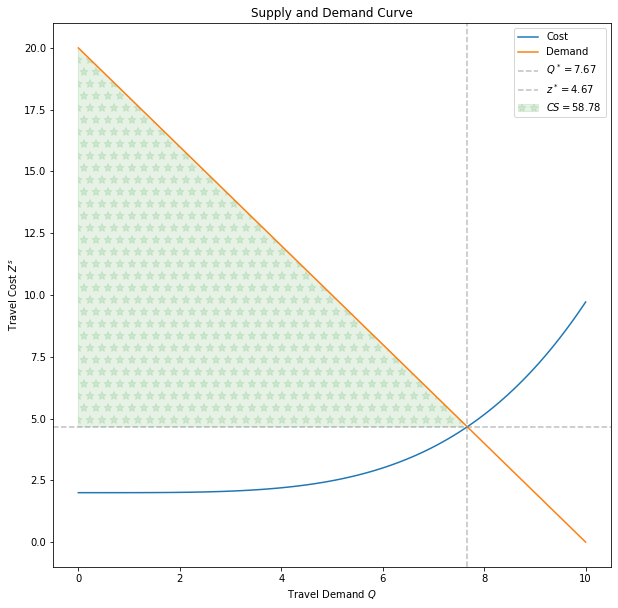

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
ax.axvline(res.root,ls="--",color="grey",alpha=0.5,label=f"$Q^*={res.root:,.2f}$")
ax.axhline(Z(res.root),ls="--",color="grey",alpha=0.5,label=f"$z^*={Z(res.root):,.2f}$")
ax.fill_between(Qs,Z(res.root),Ds,where=Qs<res.root,alpha=0.1,hatch="*",color="green",label=f"$CS={cs:,.2f}$")
ax.legend()

In [96]:
# confirm the consumer surplus, which for linear is q^2/2β
np.power(res.root,2)/(2*β)

58.78187002744739

# Question: what about the area below the price?  Does that count as producer surplus?  What is the analogy?

### Untolled equilibrium

#### (a) If the toll is zero, what is the equilibrium traffic flow $Q$ and user cost $z$?

In [31]:
print(f"Q*={res.root:,.2f}, z*=${Z(res.root):,.2f}")

Q*=7.67, z*=$4.67


#### (b) What is consumer surplus without a toll?

In [45]:
print(f"CS={cs:,.2f}")

CS=58.78


### Social Optimum

#### (c) Write an expression for marginal social cost as a function of $Q$.

Per the lecture slides,

$$TSC(Q)=Q*Z^s(Q)$$

and

$$MSC(Q)=\frac{\delta TSC}{\delta Q} = Z^s(Q) + Q \frac{\delta Z^s(Q)}{\delta Q}$$

$$\frac{\delta Z^s(Q)}{\delta Q} = \frac{4 \mu Q^3 t_f}{\gamma^4}$$

$$\therefore MSC(Q) = z_0+\mu t_f[1+(\frac{Q}{\gamma})^4] + \frac{4 \mu Q^4 t_f}{\gamma^4}$$

In [81]:
def MSC(q,z_0=z_0,μ=μ,γ=γ,t_f=t_f):
    msc = Z(q) + 4.0 * μ * np.power(q,4) * t_f / np.power(γ,4)
    return msc

In [82]:
MSCs = [MSC(q) for q in Qs]

In [86]:
f2 = lambda q: Qinverse(q) - MSC(q)
res2 = root_scalar(f2,x0=6.0,bracket=(5.5,7.0))
print(res2.root)

6.1822067900301505


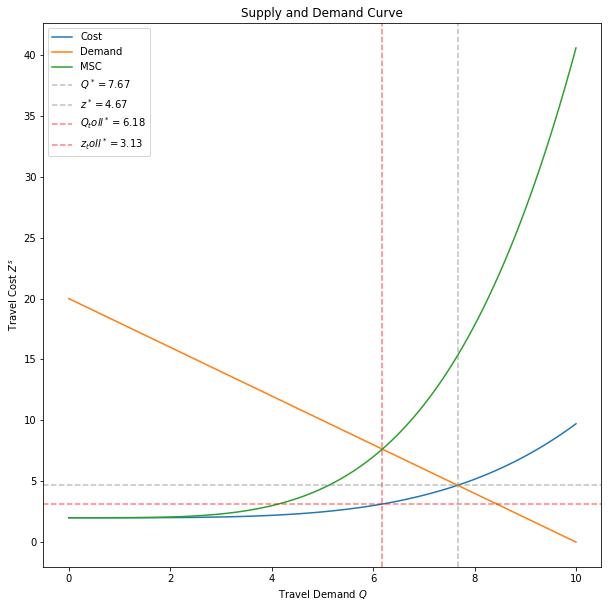

In [93]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand")
plt.plot(Qs,MSCs,label="MSC")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
ax.axvline(res.root,ls="--",color="grey",alpha=0.5,label=f"$Q^*={res.root:,.2f}$")
ax.axhline(Z(res.root),ls="--",color="grey",alpha=0.5,label=f"$z^*={Z(res.root):,.2f}$")
ax.axvline(res2.root,ls="--",color="red",alpha=0.5,label=f"$Q_toll^*={res2.root:,.2f}$")
ax.axhline(Z(res2.root),ls="--",color="red",alpha=0.5,label=f"$z_toll^*={Z(res2.root):,.2f}$")
# ax.fill_between(Qs,Z(res.root),Ds,where=Qs<res.root,alpha=0.1,hatch="*",color="green",label=f"$CS={cs:,.2f}$")
ax.legend()

#### (d) What is the welfare-maximizing toll level?

In [94]:
print(f"Wellfare maximizing toll is ${Qinverse(res2.root)-Qinverse(res.root):,.2f} with a travel demand of {res.root:,.2f}")

Wellfare maximizing toll is $2.97 with a travel demand of 7.67


#### (e) Given the welfare-maximizing toll, calculate

##### i. Consumer Surplus

##### ii. Total toll revenue

In [95]:
print(f"Total toll revenue = ${(Qinverse(res2.root)-Qinverse(res.root))*res.root:,.2f}")

Total toll revenue = $22.77


### Revenue Maximization

#### (f) What is the revenue-maximizing toll?

#### (g) Given the revenue calculating toll, calculate

##### i. Consumer surplus

##### ii. Total toll revenue

### Queuing

Supposed that there is a bottleneck with capacity 7 at the upstream entrance to the highway.

#### (h) In equilibrium, how much time do vehicles spend queueing?

#### (i) What toll would eliminate queueing?